## A view into the energy consumption of Slovenia by type of energy source and usage yearly
Data mining, project, `12.4.2022`  
**`Marta Rašeta`, `Tilen Berlak`, `Aladin Ćemalović`**

In [123]:
#Preparing the data


#Replace the unknown/null values with -1 to be able to put them into a numpy matrix
with open("usage_data.csv") as f_input:
    text = [l.replace("-", "-1") for l in f_input]
import numpy as np
usage_data= np.loadtxt(text, delimiter=",", dtype="float")


column_names = []
row_names = []
#Get the column and row names 
f = open("usage_headers.csv", "r")
column_names=f.readline().strip().split(",")

for x in f:
    row_names.append(x.strip())
row_names=np.array(row_names)    



In [139]:
import matplotlib.pyplot as plt

w=int(len(column_names)/10)
h=len(row_names)-1

matrix = [[0 for x in range(h)] for y in range(w)] 

for year in range(w):
    count=0
    for x in usage_data[1:,year*10]:

        matrix[year][count]=x
        count+=1
  
npmat =np.array(matrix)

#Delete unnecessary metrics
names=np.delete(row_names,[0,5],0)
npmat=np.delete(npmat,4,axis=1)

#### What is the average consumption of all energy consumers?
For this question we will calculate the average energy consumption for every usage and represent the data on a barplot. 

<BarContainer object of 13 artists>

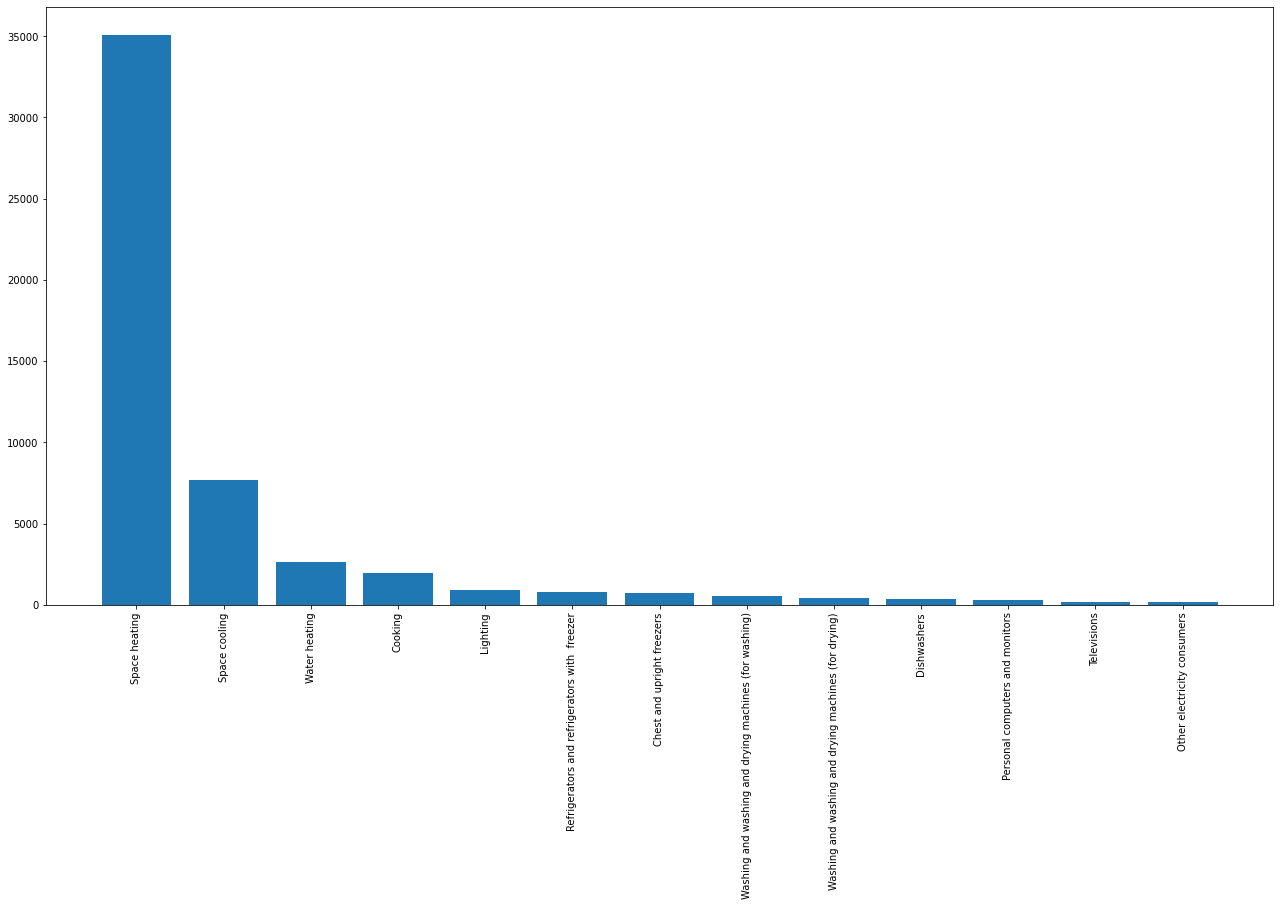

In [151]:
averages = []
transpose = npmat.transpose()
plt.figure(figsize=(22, 11))  
for x in transpose:
    averages.append(np.average(x))
averages.sort(reverse=True) 
plt.xticks(rotation='vertical')
plt.bar(names,averages)  



#### Which are the 2 biggest consumers of all energy uses by year and how much do they consume?
For this question we will extract the top 2 energy consumers and represent their consumption over the years.
The unit used in the data is TJ (Terajoules).

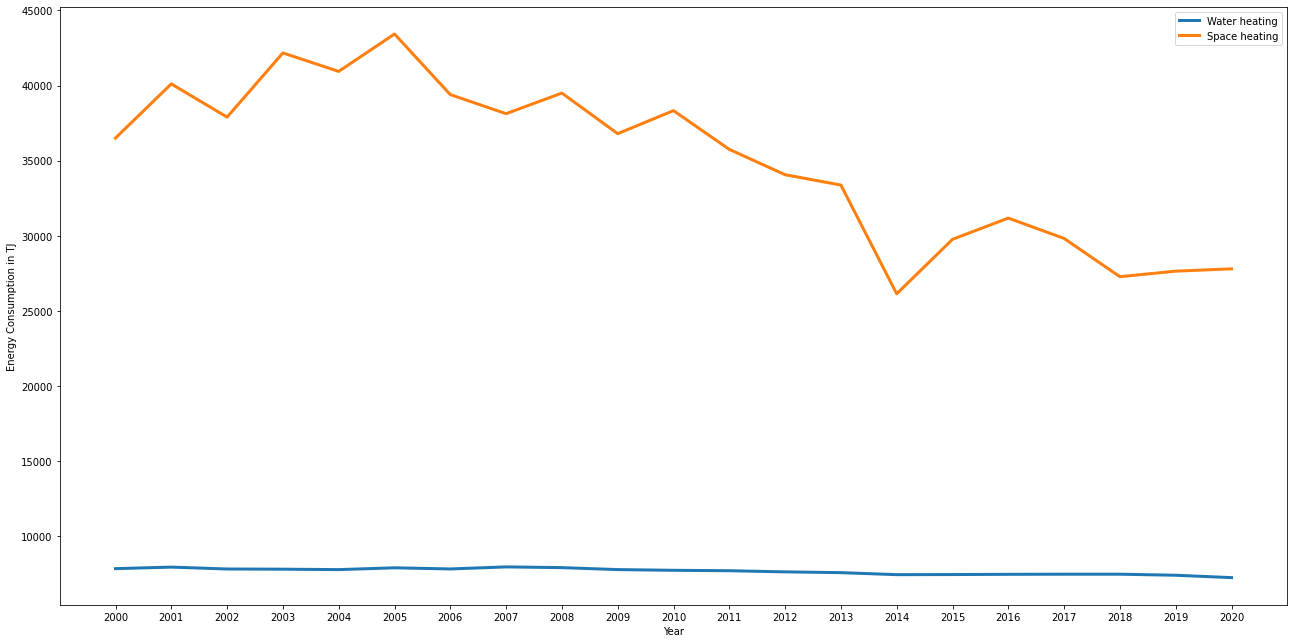

In [140]:

#Make dictionaries with top 2 consumption amounts by year
yearly_app = {}
yearly_cons={}
ct=0

for x in npmat:
    index_cons_max = np.argpartition(x, -2)[-2:]
    yearly_cons[str(2000+ct)]=x[index_cons_max]
    ct+=1


    
years=yearly_cons.keys()
n1=[]
n2=[]
for x in yearly_cons.values():
    n1.append(x[0])
    n2.append(x[1])



plt.figure(figsize=(22, 11))
plt.plot(years,n1,label=names[index_cons_max[0]], linewidth=3.0)
plt.plot(years,n2,label=names[index_cons_max[1]], linewidth=3.0)
plt.xlabel("Year")
plt.ylabel("Energy Consumption in TJ")
plt.legend()
plt.show()